In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import zipfile

zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In [3]:
df = pd.read_csv('../project_data/Data/train_data.csv')

C:\Users\xandg\AppData\Local\Temp\ipykernel_724\2564130253.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../project_data/Data/train_data.csv')


In [4]:
len(df)

593471

In [326]:
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


In [336]:
'''ideia 1- vamos ver se OIIC nature nao tem valores e caso seja o caso remover a coluna'''
coluna = df['OIICS Nature of Injury Description']
coluna.head(3)
coluna.isnull().sum()
df = df.drop('OIICS Nature of Injury Description', axis=1)

In [338]:
'''ideia 2- retirar as linhas que não mostram a decisão final'''
df = df.dropna(subset=['Claim Injury Type'])
df.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 0 to 593467
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Accident Date                      570337 non-null  object 
 1   Age at Injury                      574026 non-null  float64
 2   Alternative Dispute Resolution     574026 non-null  object 
 3   Assembly Date                      574026 non-null  object 
 4   Attorney/Representative            574026 non-null  object 
 5   Average Weekly Wage                545375 non-null  float64
 6   Birth Year                         544948 non-null  float64
 7   C-2 Date                           559466 non-null  object 
 8   C-3 Date                           187245 non-null  object 
 9   Carrier Name                       574026 non-null  object 
 10  Carrier Type                       574026 non-null  object 
 11  Claim Identifier                   574026 no

In [342]:
'''ideia 3- eu desconfio que se existe um advogado envolvido existe mais chance de ser concedida a baixa'''
df['Attorney/Representative'].unique()

array(['N', 'Y'], dtype=object)

<Axes: ylabel='count'>

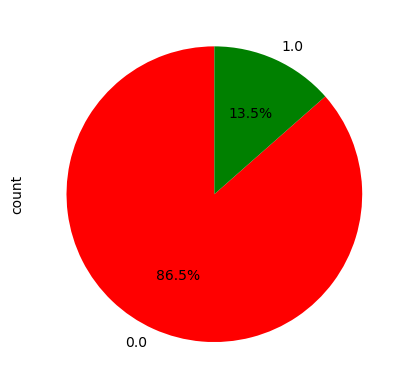

In [344]:
#com advogado
data_atorney_y = df[df['Attorney/Representative'] == 'Y']
contagem_agreement_Y = data_atorney_y['Agreement Reached'].value_counts()
contagem_agreement_Y.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

<Axes: ylabel='count'>

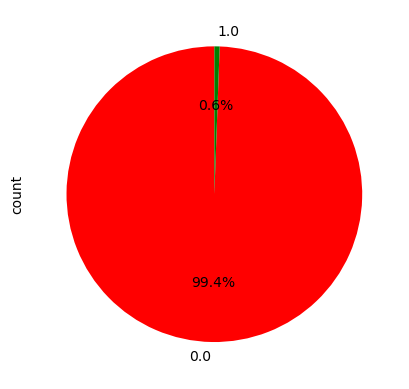

In [274]:
#sem advogado
data_atorney_y = df[df['Attorney/Representative'] == 'N']
contagem_agreement_N = data_atorney_y['Agreement Reached'].value_counts()
contagem_agreement_N.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

In [346]:
'''ideia 4- olhamos para o WCB'''
df['WCB Decision'].unique()
#mais uma coluna irrelevante pois é sempre igual logo retirar
df = df.drop('WCB Decision', axis=1)

In [348]:
'''ideia 5- Vamos ver o covid'''
df['COVID-19 Indicator'].unique()

array(['N', 'Y'], dtype=object)

<Axes: ylabel='count'>

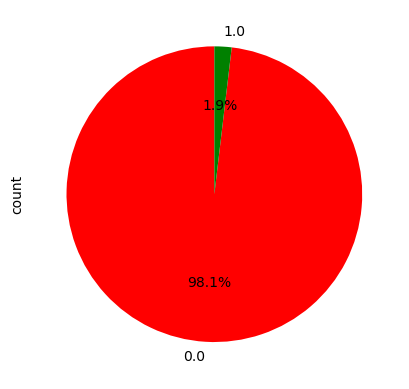

In [350]:
#com covid
data_atorney_y = df[df['COVID-19 Indicator'] == 'Y']
contagem_agreement_Y = data_atorney_y['Agreement Reached'].value_counts()
contagem_agreement_Y.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

<Axes: ylabel='count'>

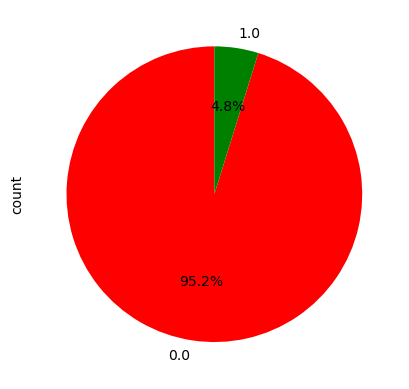

In [351]:
#com covid
data_atorney_y = df[df['COVID-19 Indicator'] == 'N']
contagem_agreement_N = data_atorney_y['Agreement Reached'].value_counts()
contagem_agreement_N.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

In [354]:
'''ideia 6- Notamos que muitos dos salarios são 0 ou NaN, para tentar corrigir isto vamos agora fazer o salário médio de cada setor para complementar os dados'''
df['Industry Code'].unique()

array([44., 23., 56., 62., 72., 61., 51., 31., 48., 45., 42., 53., 52.,
       49., 81., 92., 33., 54., 32., 71., nan, 22., 11., 21., 55.])

In [310]:
# Filtrar o DataFrame para excluir salários iguais a zero
df_filtrado = df[df['Average Weekly Wage'] > 0]

# Agrupar pelos códigos de indústria e calcular a mediana do salário (nao contar muito com os outliers
median_salary_por_industry = df_filtrado.groupby('Industry Code')['Average Weekly Wage'].median()
# Exibir a média dos salários por código de indústria
print(median_salary_por_industry)

Industry Code
11.0     822.957028
21.0    1293.506740
22.0    2261.219167
23.0    1480.245450
31.0    1021.929750
32.0    1044.570593
33.0    1128.975171
42.0    1107.974569
44.0     840.986650
45.0     807.817383
48.0    1223.198532
49.0    1460.833198
51.0    2281.836575
52.0    1186.186458
53.0    1180.260811
54.0    1207.185727
55.0    1272.659775
56.0     933.775629
61.0    1065.152480
62.0    1208.683868
71.0    1335.882949
72.0     763.658343
81.0     951.973195
92.0    1677.352074
Name: Average Weekly Wage, dtype: float64


In [312]:
# Função para substituir 0 e NaN pela média do salário do "Industry Code"
def substituir_wage(row):
    if pd.isna(row['Average Weekly Wage']) or row['Average Weekly Wage'] == 0:
        # Verificar se o Industry Code não é NaN antes de tentar acessar a média
        industry_code = row['Industry Code']
        if not pd.isna(industry_code) and industry_code in median_salary_por_industry.index:
            return median_salary_por_industry[industry_code]
    return row['Average Weekly Wage']

# Aplicar a função ao DataFrame
df['Average Weekly Wage'] = df.apply(substituir_wage, axis=1)

In [316]:
print(df['Average Weekly Wage'].head(10))

0      840.986650
1     1745.930000
2     1434.800000
4     1208.683868
5      840.986650
6      763.658343
7     1208.683868
8     1065.152480
9      225.000000
10     840.986650
Name: Average Weekly Wage, dtype: float64
